In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/dataset_2_1/word2vec_embeddings_2_1.csv")
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,Labels
0,0,-0.738774,0.423808,0.003995,0.273944,0.278326,-1.121458,0.454719,1.502387,-0.452733,...,0.342938,0.410237,0.152521,1.277104,0.658314,0.545501,-0.570829,0.249611,-0.109978,defamation
1,1,-0.619033,0.329192,0.022692,0.235937,0.248457,-0.965012,0.380227,1.300560,-0.398977,...,0.294719,0.373720,0.122191,1.099739,0.572746,0.456177,-0.471100,0.207174,-0.086312,defamation
2,3,-0.693572,0.377203,-0.034788,0.021350,0.108946,-1.090244,0.477415,1.511605,-0.494512,...,0.443037,0.403338,0.099636,1.272146,0.625714,0.480765,-0.551331,0.484435,-0.256572,defamation
3,4,-0.681069,0.340770,0.052980,0.315516,0.321273,-1.118251,0.403905,1.505227,-0.433163,...,0.304497,0.480876,0.130662,1.245840,0.641551,0.486499,-0.506558,0.170703,-0.054753,defamation
4,5,-0.568426,0.297694,0.019018,0.214299,0.226075,-0.884223,0.346650,1.185971,-0.361593,...,0.267246,0.342426,0.114498,1.000346,0.523614,0.422006,-0.431162,0.188914,-0.078274,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,4041,-0.779790,0.419201,-0.027950,0.105477,0.166144,-1.162058,0.510629,1.650489,-0.536758,...,0.455263,0.431638,0.114406,1.403890,0.703540,0.539786,-0.626917,0.437933,-0.243344,defamation
1616,4042,-0.602445,0.326560,0.016870,0.224314,0.241340,-0.932888,0.367645,1.251516,-0.384725,...,0.293810,0.364241,0.117301,1.064326,0.556337,0.447425,-0.455451,0.205431,-0.094660,fake
1617,4043,-0.551204,0.282311,0.028558,0.227460,0.239450,-0.869473,0.336270,1.166686,-0.359638,...,0.253267,0.343897,0.114949,0.978903,0.518506,0.412894,-0.419750,0.168750,-0.065869,defamation
1618,4045,-0.610508,0.325818,0.016663,0.223962,0.238698,-0.951373,0.377389,1.279268,-0.385967,...,0.286671,0.363505,0.124844,1.079881,0.563961,0.456501,-0.462929,0.208613,-0.082545,fake


In [ ]:
X=data.drop(["Labels","Unnamed: 0"], axis=1)
y=data["Labels"]

In [ ]:
for i in range(1620):
  if y[i] == 'fake':
    y[i] = int(1)
  else:
    y[i] = int(0)

<ipython-input-6-e3fb3919ab3a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = int(0)
<ipython-input-6-e3fb3919ab3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = int(1)


In [ ]:
y

0       0
1       0
2       0
3       0
4       1
       ..
1615    0
1616    1
1617    0
1618    1
1619    1
Name: Labels, Length: 1620, dtype: object

In [ ]:
y = y.astype(str).astype(int)

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.33, random_state=42,shuffle = True)

In [ ]:
ttw1a = []
tw1a = []
tth1a = []
th1a = []
ttw1p = []
tw1p = []
tth1p = []
th1p = []
ttw1r = []
tw1r = []
tth1r = []
th1r = []
ttw1f = []
tw1f = []
tth1f = []
th1f = []

Accuracy of SVM:  0.6205607476635514
Precision of SVM:  0.6341015636814565
Recall of SVM:  0.6205607476635514
F1-score of SVM:  0.5906645801235212
              precision    recall  f1-score   support

           0       0.67      0.34      0.45       244
           1       0.61      0.86      0.71       291

    accuracy                           0.62       535
   macro avg       0.64      0.60      0.58       535
weighted avg       0.63      0.62      0.59       535



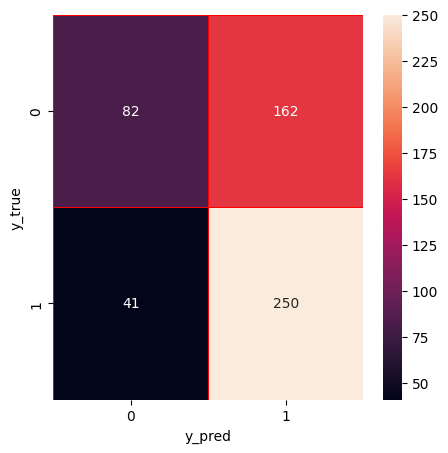

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0)  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly')

# Fit the SVM model to the training data
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_predict = svm_classifier.predict(X_test)

# Calculate accuracy
svm_score = accuracy_score(y_test, y_predict)
print('Accuracy of SVM: ', svm_score)

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict, average='weighted')
print('Precision of SVM: ', precision)
print('Recall of SVM: ', recall)
print('F1-score of SVM: ', fscore)
tw1a.append(svm_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)

# Generate a classification report
print(classification_report(y_test, y_predict))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


Accuracy of SVM:  0.6147465437788019
Precision of SVM:  0.6626630673210362
Recall of SVM:  0.6147465437788019
F1-score of SVM:  0.5934601623134274
              precision    recall  f1-score   support

           0       0.75      0.39      0.51       566
           1       0.56      0.86      0.68       519

    accuracy                           0.61      1085
   macro avg       0.66      0.62      0.60      1085
weighted avg       0.66      0.61      0.59      1085



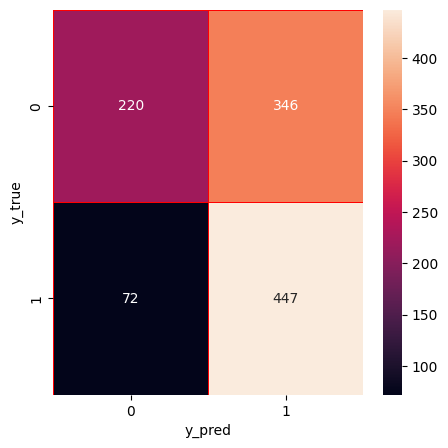

In [ ]:

# Predict the labels for the test data
y_predict = svm_classifier.predict(X_train)

# Calculate accuracy
svm_score = accuracy_score(y_train, y_predict)
print('Accuracy of SVM: ', svm_score)

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_predict, average='weighted')
print('Precision of SVM: ', precision)
print('Recall of SVM: ', recall)
print('F1-score of SVM: ', fscore)

ttw1a.append(svm_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)

# Generate a classification report
print(classification_report(y_train, y_predict))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_train, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()




In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define the objective function
def objective(params):
    params = {
        'C': params['C'],
        'kernel': params['kernel'],  # Specify kernel from hyperparameter search space
    }

    clf = SVC(**params)

    # Use cross-validation for better evaluation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')

    # Calculate the mean accuracy
    score = scores.mean()

    return {'loss': -score, 'status': STATUS_OK}

# Define the hyperparameter search space
space = {
    'C': hp.loguniform('C', -3, 3),  # Search in log scale for C (SVM regularization parameter)
    'kernel': hp.choice('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
    # You can add more hyperparameters here as needed
}

# Perform hyperparameter tuning
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

print("SVM: Hyperopt estimated optimum {}".format(best))


100%|██████████| 20/20 [00:07<00:00,  2.76trial/s, best loss: -0.695852534562212]
SVM: Hyperopt estimated optimum {'C': 11.64982828134434, 'kernel': 0}


Accuracy of SVM:  0.6747663551401869
Precision of SVM:  0.6735638268826291
Recall of SVM:  0.6747663551401869
F1-score of SVM:  0.6730122953922361
              precision    recall  f1-score   support

           0       0.66      0.60      0.63       244
           1       0.69      0.74      0.71       291

    accuracy                           0.67       535
   macro avg       0.67      0.67      0.67       535
weighted avg       0.67      0.67      0.67       535



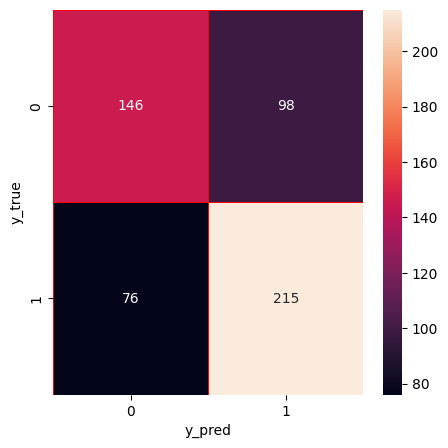

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', C= 19.900388328447658)  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly')

# Fit the SVM model to the training data
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_predict = svm_classifier.predict(X_test)

# Calculate accuracy
svm_score = accuracy_score(y_test, y_predict)
print('Accuracy of SVM: ', svm_score)

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict, average='weighted')
print('Precision of SVM: ', precision)
print('Recall of SVM: ', recall)
print('F1-score of SVM: ', fscore)
th1a.append(svm_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)

# Generate a classification report
print(classification_report(y_test, y_predict))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


Accuracy of SVM:  0.6847926267281106
Precision of SVM:  0.6896669352882727
Recall of SVM:  0.6847926267281106
F1-score of SVM:  0.6843613480707788
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       566
           1       0.65      0.74      0.69       519

    accuracy                           0.68      1085
   macro avg       0.69      0.69      0.68      1085
weighted avg       0.69      0.68      0.68      1085



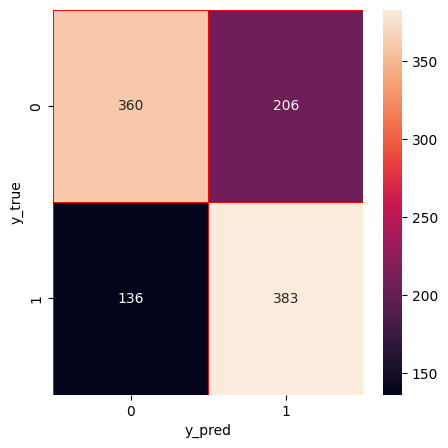

In [ ]:

# Predict the labels for the test data
y_predict = svm_classifier.predict(X_train)

# Calculate accuracy
svm_score = accuracy_score(y_train, y_predict)
print('Accuracy of SVM: ', svm_score)

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_predict, average='weighted')
print('Precision of SVM: ', precision)
print('Recall of SVM: ', recall)
print('F1-score of SVM: ', fscore)

tth1a.append(svm_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)

# Generate a classification report
print(classification_report(y_train, y_predict))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_train, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()




Accuracy of XGBoost: 0.6280373831775701
Precision of XGBoost: 0.6306327053404875
Recall of XGBoost: 0.6280373831775701
F1-score of XGBoost: 0.6287022423191786
              precision    recall  f1-score   support

           0       0.59      0.63      0.61       244
           1       0.67      0.63      0.65       291

    accuracy                           0.63       535
   macro avg       0.63      0.63      0.63       535
weighted avg       0.63      0.63      0.63       535



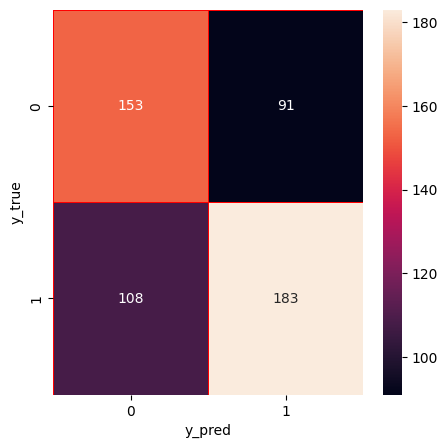

In [ ]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
tw1a.append(xg_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of XGBoost: 0.9410138248847926
Precision of XGBoost: 0.9413237206214625
Recall of XGBoost: 0.9410138248847926
F1-score of XGBoost: 0.9409631470578597
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       566
           1       0.95      0.92      0.94       519

    accuracy                           0.94      1085
   macro avg       0.94      0.94      0.94      1085
weighted avg       0.94      0.94      0.94      1085



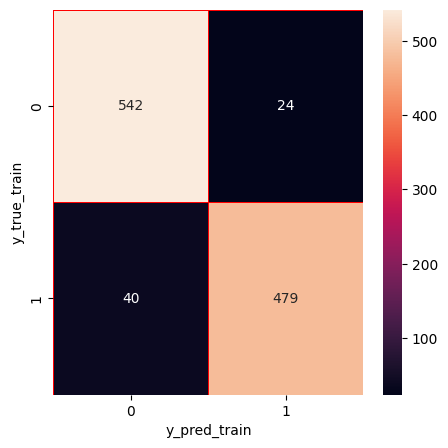

In [ ]:
xg_score=xg.score(X_train,y_train)
y_predict=xg.predict(X_train)
y_true=y_train
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
ttw1a.append(xg_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),

    }
    clf = xgb.XGBClassifier( **params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:35<00:00,  1.75s/trial, best loss: -0.6242990654205608]
XGBoost: Hyperopt estimated optimum {'learning_rate': -1.5548905598152798, 'max_depth': 21.0, 'n_estimators': 45.0}


Accuracy of XGBoost: 0.6037383177570094
Precision of XGBoost: 0.6073031308424276
Recall of XGBoost: 0.6037383177570094
F1-score of XGBoost: 0.6045014267389198
              precision    recall  f1-score   support

           0       0.56      0.61      0.58       244
           1       0.65      0.60      0.62       291

    accuracy                           0.60       535
   macro avg       0.60      0.60      0.60       535
weighted avg       0.61      0.60      0.60       535



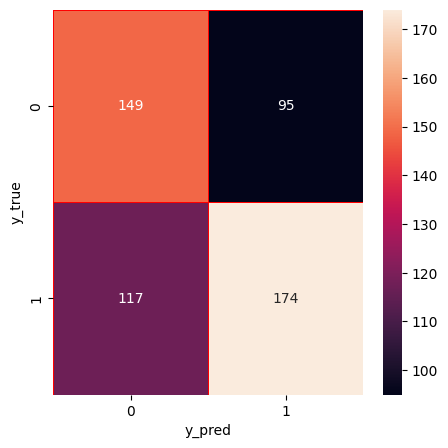

In [ ]:
xg = xgb.XGBClassifier(learning_rate= 0.9352296067937884, n_estimators = 20, max_depth = 94)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
th1a.append(xg_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of XGBoost: 0.9806451612903225
Precision of XGBoost: 0.9806552472916121
Recall of XGBoost: 0.9806451612903225
F1-score of XGBoost: 0.9806426898814343
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       566
           1       0.98      0.98      0.98       519

    accuracy                           0.98      1085
   macro avg       0.98      0.98      0.98      1085
weighted avg       0.98      0.98      0.98      1085



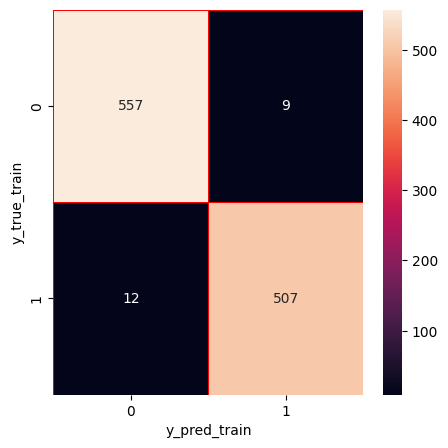

In [ ]:
xg_score=xg.score(X_train,y_train)
y_predict=xg.predict(X_train)
y_true=y_train
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tth1a.append(xg_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

Accuracy of RF: 0.6280373831775701
Precision of RF: 0.6345167885137172
Recall of RF: 0.6280373831775701
F1-score of RF: 0.6285834673252954
              precision    recall  f1-score   support

           0       0.58      0.66      0.62       244
           1       0.68      0.60      0.64       291

    accuracy                           0.63       535
   macro avg       0.63      0.63      0.63       535
weighted avg       0.63      0.63      0.63       535



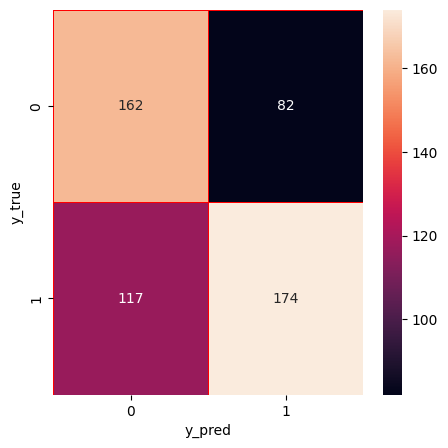

In [ ]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train)
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tw1a.append(rf_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of RF: 0.9806451612903225
Precision of RF: 0.9807639633693591
Recall of RF: 0.9806451612903225
F1-score of RF: 0.9806368528582448
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       566
           1       0.99      0.97      0.98       519

    accuracy                           0.98      1085
   macro avg       0.98      0.98      0.98      1085
weighted avg       0.98      0.98      0.98      1085



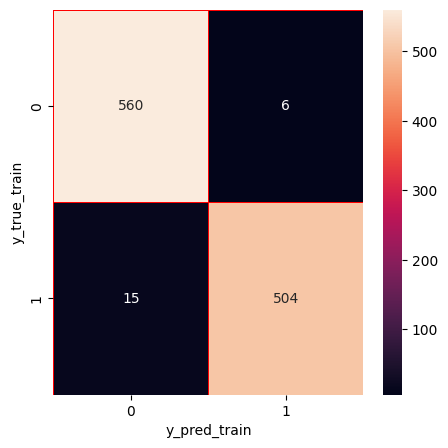

In [ ]:
rf_score=rf.score(X_train,y_train)
y_predict=rf.predict(X_train)
y_true=y_train
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
ttw1a.append(rf_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = RandomForestClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:16<00:00,  1.20trial/s, best loss: -0.6467289719626168]
Random Forest: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 6.0, 'max_features': 16.0, 'min_samples_leaf': 7.0, 'min_samples_split': 10.0, 'n_estimators': 111.0}


Accuracy of RF: 0.6411214953271028
Precision of RF: 0.645969142783086
Recall of RF: 0.6411214953271028
F1-score of RF: 0.6417893771327375
              precision    recall  f1-score   support

           0       0.60      0.66      0.63       244
           1       0.69      0.62      0.65       291

    accuracy                           0.64       535
   macro avg       0.64      0.64      0.64       535
weighted avg       0.65      0.64      0.64       535



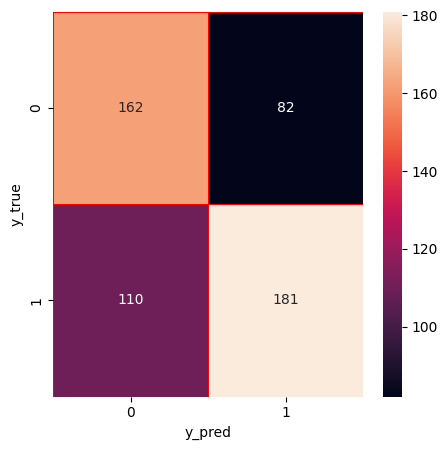

In [ ]:
rf_hpo = RandomForestClassifier(n_estimators = 25, min_samples_leaf = 10, max_depth = 24, min_samples_split = 6, max_features = 11, criterion = 'entropy')
rf_hpo.fit(X_train,y_train)
rf_score=rf_hpo.score(X_test,y_test)
y_predict=rf_hpo.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
th1a.append(rf_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of RF: 0.8460829493087557
Precision of RF: 0.8465140979692874
Recall of RF: 0.8460829493087557
F1-score of RF: 0.845846566203349
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       566
           1       0.86      0.82      0.84       519

    accuracy                           0.85      1085
   macro avg       0.85      0.84      0.85      1085
weighted avg       0.85      0.85      0.85      1085



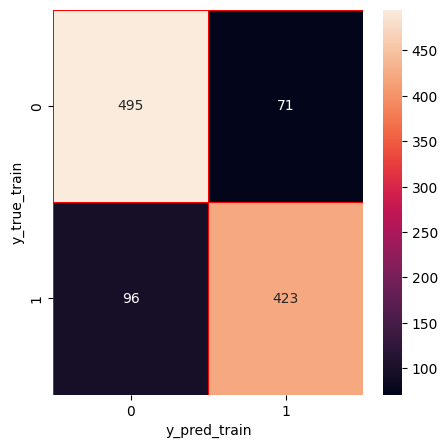

In [ ]:
rf_score=rf_hpo.score(X_train,y_train)
y_predict=rf_hpo.predict(X_train)
y_true=y_train
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tth1a.append(rf_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
rf_train=rf_hpo.predict(X_train)
rf_test=rf_hpo.predict(X_test)

Accuracy of DT: 0.5794392523364486
Precision of DT: 0.5817631499264981
Recall of DT: 0.5794392523364486
F1-score of DT: 0.5801470659797335
              precision    recall  f1-score   support

           0       0.54      0.57      0.55       244
           1       0.62      0.59      0.60       291

    accuracy                           0.58       535
   macro avg       0.58      0.58      0.58       535
weighted avg       0.58      0.58      0.58       535



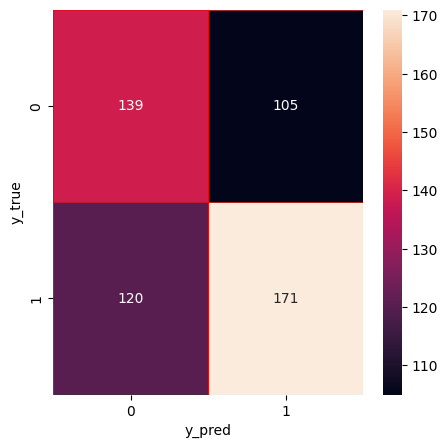

In [ ]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train)
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tw1a.append(dt_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of DT: 0.9806451612903225
Precision of DT: 0.9813375831180963
Recall of DT: 0.9806451612903225
F1-score of DT: 0.9806215908604173
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       566
           1       1.00      0.96      0.98       519

    accuracy                           0.98      1085
   macro avg       0.98      0.98      0.98      1085
weighted avg       0.98      0.98      0.98      1085



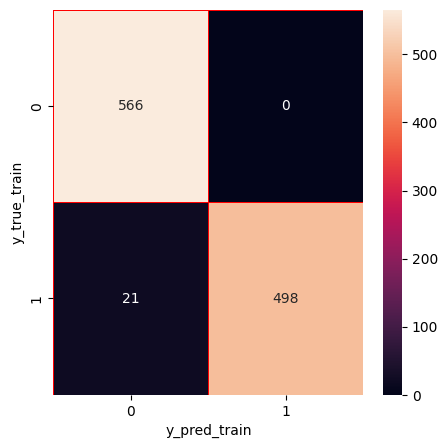

In [ ]:
dt_score=dt.score(X_train,y_train)
y_predict=dt.predict(X_train)
y_true=y_train
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
ttw1a.append(dt_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = DecisionTreeClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)
print("Decision tree: Hyperopt estimated optimum {}".format(best))

100%|██████████| 50/50 [00:01<00:00, 40.27trial/s, best loss: -0.6280373831775701]
Decision tree: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 5.0, 'max_features': 6.0, 'min_samples_leaf': 2.0, 'min_samples_split': 10.0}


Accuracy of DT: 0.6205607476635514
Precision of DT: 0.6314129573895138
Recall of DT: 0.6205607476635514
F1-score of DT: 0.6202902963238778
              precision    recall  f1-score   support

           0       0.57      0.69      0.62       244
           1       0.68      0.56      0.62       291

    accuracy                           0.62       535
   macro avg       0.63      0.63      0.62       535
weighted avg       0.63      0.62      0.62       535



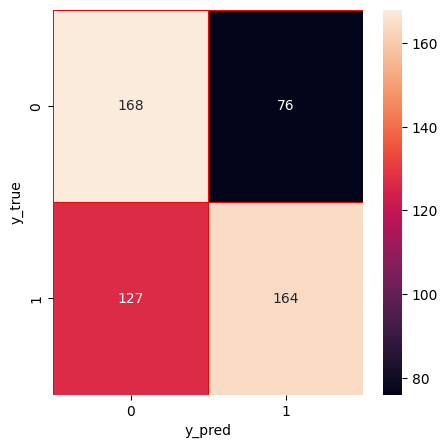

In [ ]:
dt_hpo = DecisionTreeClassifier(min_samples_leaf = 2, max_depth = 7, min_samples_split = 10, max_features = 5, criterion = 'entropy')
dt_hpo.fit(X_train,y_train)
dt_score=dt_hpo.score(X_test,y_test)
y_predict=dt_hpo.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
th1a.append(dt_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of DT: 0.7502304147465437
Precision of DT: 0.753629267850998
Recall of DT: 0.7502304147465437
F1-score of DT: 0.7482642174730507
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       566
           1       0.78      0.67      0.72       519

    accuracy                           0.75      1085
   macro avg       0.75      0.75      0.75      1085
weighted avg       0.75      0.75      0.75      1085



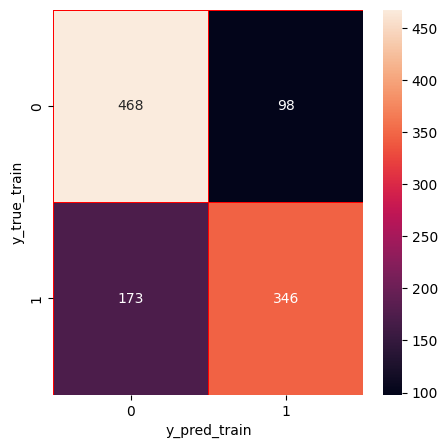

In [ ]:
dt_score=dt_hpo.score(X_train,y_train)
y_predict=dt_hpo.predict(X_train)
y_true=y_train
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tth1a.append(dt_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
dt_train=dt_hpo.predict(X_train)
dt_test=dt_hpo.predict(X_test)

Accuracy of ET: 0.611214953271028
Precision of ET: 0.6160099248114015
Recall of ET: 0.611214953271028
F1-score of ET: 0.611938491893799
              precision    recall  f1-score   support

           0       0.57      0.63      0.60       244
           1       0.66      0.59      0.62       291

    accuracy                           0.61       535
   macro avg       0.61      0.61      0.61       535
weighted avg       0.62      0.61      0.61       535



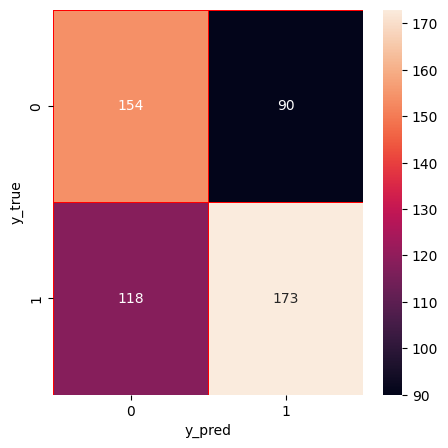

In [ ]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train)
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
tw1a.append(et_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of ET: 0.9806451612903225
Precision of ET: 0.9813375831180963
Recall of ET: 0.9806451612903225
F1-score of ET: 0.9806215908604173
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       566
           1       1.00      0.96      0.98       519

    accuracy                           0.98      1085
   macro avg       0.98      0.98      0.98      1085
weighted avg       0.98      0.98      0.98      1085



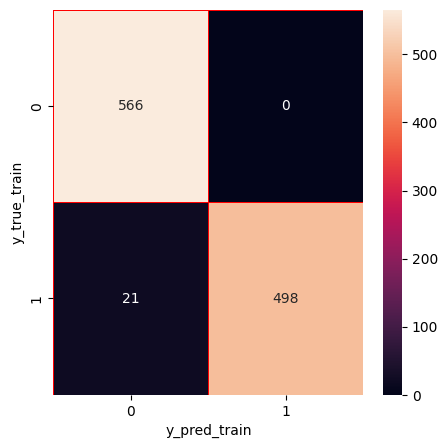

In [ ]:
et_score=et.score(X_train,y_train)
y_predict=et.predict(X_train)
y_true=y_train
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
ttw1a.append(et_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = ExtraTreesClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:04<00:00,  4.31trial/s, best loss: -0.6504672897196262]
Random Forest: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 16.0, 'max_features': 12.0, 'min_samples_leaf': 8.0, 'min_samples_split': 3.0, 'n_estimators': 17.0}


Accuracy of ET: 0.6392523364485981
Precision of ET: 0.6425987969983737
Recall of ET: 0.6392523364485981
F1-score of ET: 0.639942124275903
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       244
           1       0.68      0.63      0.66       291

    accuracy                           0.64       535
   macro avg       0.64      0.64      0.64       535
weighted avg       0.64      0.64      0.64       535



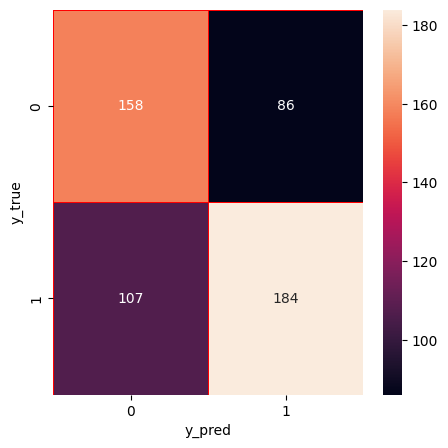

In [ ]:
et_hpo = ExtraTreesClassifier(n_estimators = 12, min_samples_leaf = 9, max_depth = 6, min_samples_split = 8, max_features = 14, criterion = 'gini')
et_hpo.fit(X_train,y_train)
et_score=et_hpo.score(X_test,y_test)
y_predict=et_hpo.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
th1a.append(et_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of ET: 0.7327188940092166
Precision of ET: 0.733262899897811
Recall of ET: 0.7327188940092166
F1-score of ET: 0.732831599514589
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       566
           1       0.71      0.74      0.72       519

    accuracy                           0.73      1085
   macro avg       0.73      0.73      0.73      1085
weighted avg       0.73      0.73      0.73      1085



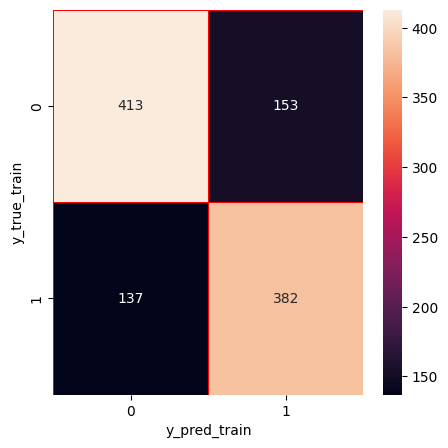

In [ ]:
et_score=et_hpo.score(X_train,y_train)
y_predict=et_hpo.predict(X_train)
y_true=y_train
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tth1a.append(et_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
et_train=et_hpo.predict(X_train)
et_test=et_hpo.predict(X_test)

[LightGBM] [Info] Number of positive: 519, number of negative: 566
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25499
[LightGBM] [Info] Number of data points in the train set: 1085, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.478341 -> initscore=-0.086690
[LightGBM] [Info] Start training from score -0.086690
Accuracy of LightGBM: 0.6205607476635514
Precision of LightGBM: 0.6251543263096182
Recall of LightGBM: 0.6205607476635514
F1-score of LightGBM: 0.6212776100662862
              precision    recall  f1-score   support

           0       0.58      0.64      0.61       244
           1       0.67      0.60      0.63       291

    accuracy                           0.62       535
   macro avg       0.62      0.62      0.62       535
weighted avg       0.63      0.62      0.62       535



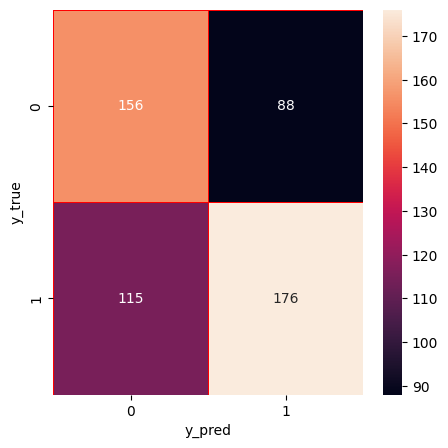

In [ ]:
lgbm = lgb.LGBMClassifier(random_state=0)
lgbm.fit(X_train, y_train)
lgbm_score = lgbm.score(X_test, y_test)
y_predict = lgbm.predict(X_test)
y_true = y_test
print('Accuracy of LightGBM: ' + str(lgbm_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LightGBM: ' + str(precision))
print('Recall of LightGBM: ' + str(recall))
print('F1-score of LightGBM: ' + str(fscore))
print(classification_report(y_true, y_predict))
tw1a.append(lgbm_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of LightGBM: 0.9806451612903225
Precision of LightGBM: 0.9806783542533265
Recall of LightGBM: 0.9806451612903225
F1-score of LightGBM: 0.9806408767708764
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       566
           1       0.98      0.97      0.98       519

    accuracy                           0.98      1085
   macro avg       0.98      0.98      0.98      1085
weighted avg       0.98      0.98      0.98      1085



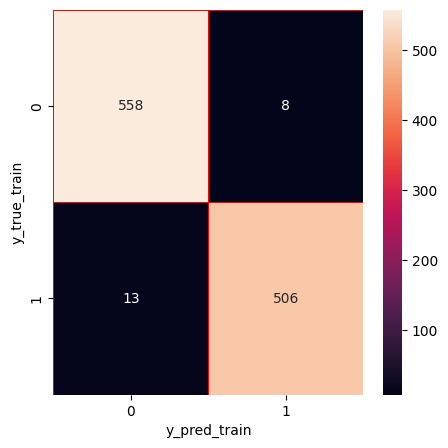

In [ ]:
lgbm_score = lgbm.score(X_train, y_train)
y_predict = lgbm.predict(X_train)
y_true = y_train
print('Accuracy of LightGBM: ' + str(lgbm_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LightGBM: ' + str(precision))
print('Recall of LightGBM: ' + str(recall))
print('F1-score of LightGBM: ' + str(fscore))
print(classification_report(y_true, y_predict))
ttw1a.append(lgbm_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'num_leaves': int(params['num_leaves']),
        'min_child_samples': int(params['min_child_samples']),
        'learning_rate': params['learning_rate'],
        'subsample': params['subsample'],
        'colsample_bytree': params['colsample_bytree']
    }
    clf = lgb.LGBMClassifier(**params, random_state=0)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)
    return {'loss':-score, 'status': STATUS_OK }
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 1),
    'max_depth': hp.quniform('max_depth', 5, 30, 1),
    'num_leaves': hp.quniform('num_leaves', 20, 100, 1),
    'min_child_samples': hp.quniform('min_child_samples', 5, 50, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0)
}
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

print("LightGBM: Hyperopt estimated optimum {}".format(best))

[LightGBM] [Info] Number of positive: 519, number of negative: 566
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002660 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25499
[LightGBM] [Info] Number of data points in the train set: 1085, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.478341 -> initscore=-0.086690
[LightGBM] [Info] Start training from score -0.086690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Info] Number of positive: 519, number of negative: 566
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25499
[LightGBM] [Info] Number of data points in the train set: 1085, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.478341 -> initscore=-0.086690
[LightGBM] [Info] Start training from score -0.086690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

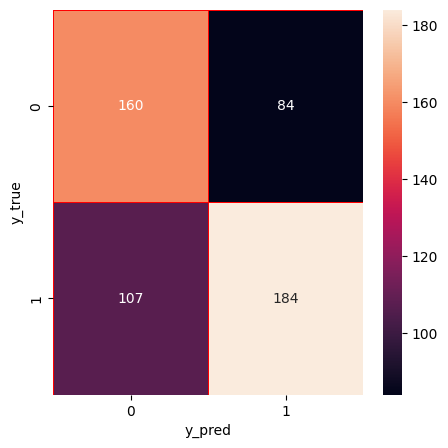

In [ ]:
best_params = {
    'n_estimators': 200,
    'max_depth': 17,
    'num_leaves': 26,
    'min_child_samples': 44,
    'learning_rate': 0.02909788620173054,
    'subsample': 0.6488465322418104,
    'colsample_bytree': 0.5651051627645269
}
lgbm_hpo = lgb.LGBMClassifier(**best_params, random_state=0)
lgbm_hpo.fit(X_train, y_train)
lgbm_score = lgbm_hpo.score(X_test, y_test)
y_predict = lgbm_hpo.predict(X_test)
y_true = y_test
print('Accuracy of LightGBM (Hyperopt): ' + str(lgbm_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LightGBM (Hyperopt): ' + str(precision))
print('Recall of LightGBM (Hyperopt): ' + str(recall))
print('F1-score of LightGBM (Hyperopt): ' + str(fscore))
th1a.append(lgbm_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of LightGBM (Hyperopt): 0.9419354838709677
Precision of LightGBM (Hyperopt): 0.9420156752743173
Recall of LightGBM (Hyperopt): 0.9419354838709677
F1-score of LightGBM (Hyperopt): 0.9419105585747346
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       566
           1       0.95      0.93      0.94       519

    accuracy                           0.94      1085
   macro avg       0.94      0.94      0.94      1085
weighted avg       0.94      0.94      0.94      1085



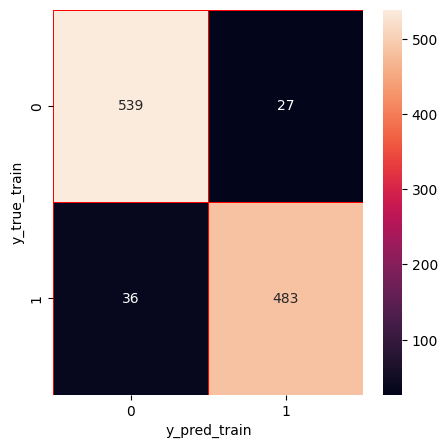

In [ ]:
lgbm_score = lgbm_hpo.score(X_train, y_train)
y_predict = lgbm_hpo.predict(X_train)
y_true = y_train
print('Accuracy of LightGBM (Hyperopt): ' + str(lgbm_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LightGBM (Hyperopt): ' + str(precision))
print('Recall of LightGBM (Hyperopt): ' + str(recall))
print('F1-score of LightGBM (Hyperopt): ' + str(fscore))
print(classification_report(y_true, y_predict))
tth1a.append(lgbm_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
lgbm_train=lgbm_hpo.predict(X_train)
lgbm_test=lgbm_hpo.predict(X_test)

Accuracy of AdaBoost: 0.6411214953271028
Precision of AdaBoost: 0.6442681113302212
Recall of AdaBoost: 0.6411214953271028
F1-score of AdaBoost: 0.6418002943033525
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       244
           1       0.68      0.64      0.66       291

    accuracy                           0.64       535
   macro avg       0.64      0.64      0.64       535
weighted avg       0.64      0.64      0.64       535



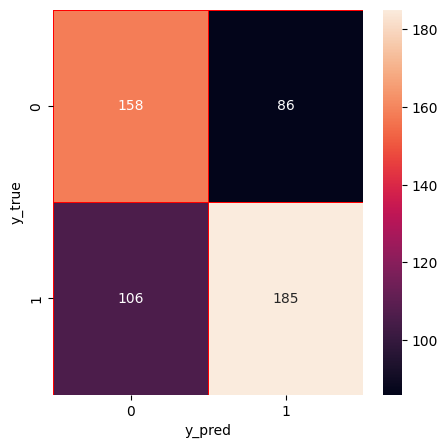

In [ ]:
adaboost = AdaBoostClassifier(random_state=0)
adaboost.fit(X_train, y_train)
adaboost_score = adaboost.score(X_test, y_test)
y_predict = adaboost.predict(X_test)
y_true = y_test
print('Accuracy of AdaBoost: ' + str(adaboost_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of AdaBoost: ' + str(precision))
print('Recall of AdaBoost: ' + str(recall))
print('F1-score of AdaBoost: ' + str(fscore))
tw1a.append(adaboost_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of AdaBoost: 0.783410138248848
Precision of AdaBoost: 0.7833477713173083
Recall of AdaBoost: 0.783410138248848
F1-score of AdaBoost: 0.7832661909980941
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       566
           1       0.78      0.76      0.77       519

    accuracy                           0.78      1085
   macro avg       0.78      0.78      0.78      1085
weighted avg       0.78      0.78      0.78      1085



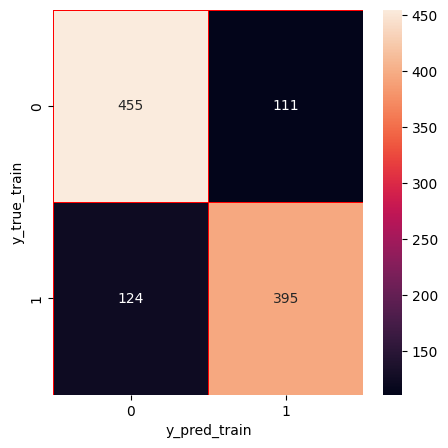

In [ ]:
adaboost_score = adaboost.score(X_train, y_train)
y_predict = adaboost.predict(X_train)
y_true = y_train
print('Accuracy of AdaBoost: ' + str(adaboost_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of AdaBoost: ' + str(precision))
print('Recall of AdaBoost: ' + str(recall))
print('F1-score of AdaBoost: ' + str(fscore))
ttw1a.append(adaboost_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'learning_rate': params['learning_rate'],
    }
    clf = AdaBoostClassifier(**params, random_state=0)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)
    return {'loss': -score, 'status': STATUS_OK}
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
}
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)
print("AdaBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [01:27<00:00,  4.36s/trial, best loss: -0.6616822429906543]
AdaBoost: Hyperopt estimated optimum {'learning_rate': 0.01774118114348084, 'n_estimators': 264.0}


Accuracy of AdaBoost (Hyperopt): 0.6654205607476635
Precision of AdaBoost (Hyperopt): 0.6660306739014091
Recall of AdaBoost (Hyperopt): 0.6654205607476635
F1-score of AdaBoost (Hyperopt): 0.665667560098165
              precision    recall  f1-score   support

           0       0.63      0.64      0.64       244
           1       0.70      0.68      0.69       291

    accuracy                           0.67       535
   macro avg       0.66      0.66      0.66       535
weighted avg       0.67      0.67      0.67       535



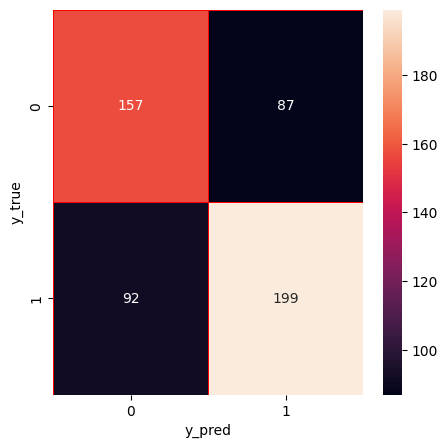

In [ ]:
best_params = {
    'n_estimators': 219,
    'learning_rate': 0.009312865849402404,
}
adaboost_hpo = AdaBoostClassifier(**best_params, random_state=0)
adaboost_hpo.fit(X_train, y_train)
adaboost_score = adaboost_hpo.score(X_test, y_test)
y_predict = adaboost_hpo.predict(X_test)
y_true = y_test
print('Accuracy of AdaBoost (Hyperopt): ' + str(adaboost_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of AdaBoost (Hyperopt): ' + str(precision))
print('Recall of AdaBoost (Hyperopt): ' + str(recall))
print('F1-score of AdaBoost (Hyperopt): ' + str(fscore))
print(classification_report(y_true, y_predict))
th1a.append(adaboost_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of AdaBoost (Hyperopt): 0.7050691244239631
Precision of AdaBoost (Hyperopt): 0.7049026697630063
Recall of AdaBoost (Hyperopt): 0.7050691244239631
F1-score of AdaBoost (Hyperopt): 0.7049259267784591
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       566
           1       0.70      0.68      0.69       519

    accuracy                           0.71      1085
   macro avg       0.70      0.70      0.70      1085
weighted avg       0.70      0.71      0.70      1085



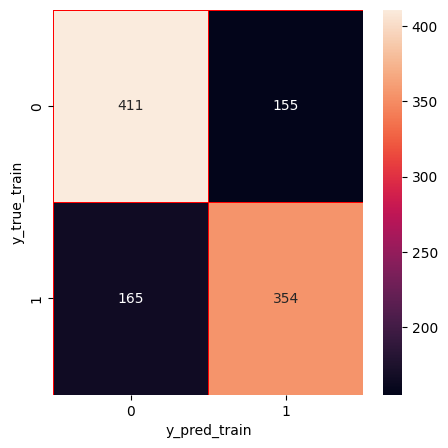

In [ ]:
adaboost_score = adaboost_hpo.score(X_train, y_train)
y_predict = adaboost_hpo.predict(X_train)
y_true = y_train
print('Accuracy of AdaBoost (Hyperopt): ' + str(adaboost_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of AdaBoost (Hyperopt): ' + str(precision))
print('Recall of AdaBoost (Hyperopt): ' + str(recall))
print('F1-score of AdaBoost (Hyperopt): ' + str(fscore))
print(classification_report(y_true, y_predict))
tth1a.append(adaboost_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
ttw = [ttw1a,ttw1p,ttw1r,ttw1f]
tw = [tw1a,tw1p,tw1r,tw1f]
tth = [tth1a,tth1p,tth1r,tth1f]
th = [th1a,th1p,th1r,th1f]
ttw = pd.DataFrame(ttw).transpose()
ttw.columns = ["Accuracy","Precision","Recall","F1Score"]
ttw.index = ["svm","xgb","rf","dt","et","lgbm","adaboost"]
tw = pd.DataFrame(tw).transpose()
tw.columns = ["Accuracy","Precision","Recall","F1Score"]
tw.index = ["svm","xgb","rf","dt","et","lgbm","adaboost"]
tth = pd.DataFrame(tth).transpose()
tth.columns = ["Accuracy","Precision","Recall","F1Score"]
tth.index = ["svm","xgb","rf","dt","et","lgbm","adaboost"]
th = pd.DataFrame(th).transpose()
th.columns = ["Accuracy","Precision","Recall","F1Score"]
th.index = ["svm","xgb","rf","dt","et","lgbm","adaboost"]

In [ ]:
df = pd.concat([ttw,tw,tth,th],axis=1)

In [ ]:
df

,Accuracy,Precision,Recall,F1Score,Accuracy,Precision,Recall,F1Score,Accuracy,Precision,Recall,F1Score,Accuracy,Precision,Recall,F1Score
svm,0.614747,0.662663,0.614747,0.593460,0.620561,0.634102,0.620561,0.590665,0.684793,0.689667,0.684793,0.684361,0.674766,0.673564,0.674766,0.673012
xgb,0.941014,0.941324,0.941014,0.940963,0.628037,0.630633,0.628037,0.628702,0.980645,0.980655,0.980645,0.980643,0.603738,0.607303,0.603738,0.604501
rf,0.980645,0.980764,0.980645,0.980637,0.628037,0.634517,0.628037,0.628583,0.846083,0.846514,0.846083,0.845847,0.641121,0.645969,0.641121,0.641789
dt,0.980645,0.981338,0.980645,0.980622,0.579439,0.581763,0.579439,0.580147,0.750230,0.753629,0.750230,0.748264,0.620561,0.631413,0.620561,0.620290
et,0.980645,0.981338,0.980645,0.980622,0.611215,0.616010,0.611215,0.611938,0.732719,0.733263,0.732719,0.732832,0.639252,0.642599,0.639252,0.639942
lgbm,0.980645,0.980678,0.980645,0.980641,0.620561,0.625154,0.620561,0.621278,0.941935,0.942016,0.941935,0.941911,0.642991,0.646744,0.642991,0.643681
adaboost,0.783410,0.783348,0.783410,0.783266,0.641121,0.644268,0.641121,0.641800,0.705069,0.704903,0.705069,0.704926,0.665421,0.666031,0.665421,0.665668


In [ ]:
df.to_excel("output.xlsx")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/dataset_2_1/word2vec_embeddings_2_1.csv")
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,Labels
0,0,-0.738774,0.423808,0.003995,0.273944,0.278326,-1.121458,0.454719,1.502387,-0.452733,...,0.342938,0.410237,0.152521,1.277104,0.658314,0.545501,-0.570829,0.249611,-0.109978,defamation
1,1,-0.619033,0.329192,0.022692,0.235937,0.248457,-0.965012,0.380227,1.300560,-0.398977,...,0.294719,0.373720,0.122191,1.099739,0.572746,0.456177,-0.471100,0.207174,-0.086312,defamation
2,3,-0.693572,0.377203,-0.034788,0.021350,0.108946,-1.090244,0.477415,1.511605,-0.494512,...,0.443037,0.403338,0.099636,1.272146,0.625714,0.480765,-0.551331,0.484435,-0.256572,defamation
3,4,-0.681069,0.340770,0.052980,0.315516,0.321273,-1.118251,0.403905,1.505227,-0.433163,...,0.304497,0.480876,0.130662,1.245840,0.641551,0.486499,-0.506558,0.170703,-0.054753,defamation
4,5,-0.568426,0.297694,0.019018,0.214299,0.226075,-0.884223,0.346650,1.185971,-0.361593,...,0.267246,0.342426,0.114498,1.000346,0.523614,0.422006,-0.431162,0.188914,-0.078274,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,4041,-0.779790,0.419201,-0.027950,0.105477,0.166144,-1.162058,0.510629,1.650489,-0.536758,...,0.455263,0.431638,0.114406,1.403890,0.703540,0.539786,-0.626917,0.437933,-0.243344,defamation
1616,4042,-0.602445,0.326560,0.016870,0.224314,0.241340,-0.932888,0.367645,1.251516,-0.384725,...,0.293810,0.364241,0.117301,1.064326,0.556337,0.447425,-0.455451,0.205431,-0.094660,fake
1617,4043,-0.551204,0.282311,0.028558,0.227460,0.239450,-0.869473,0.336270,1.166686,-0.359638,...,0.253267,0.343897,0.114949,0.978903,0.518506,0.412894,-0.419750,0.168750,-0.065869,defamation
1618,4045,-0.610508,0.325818,0.016663,0.223962,0.238698,-0.951373,0.377389,1.279268,-0.385967,...,0.286671,0.363505,0.124844,1.079881,0.563961,0.456501,-0.462929,0.208613,-0.082545,fake


In [ ]:
X=data.drop(["Labels","Unnamed: 0"], axis=1)
y=data["Labels"]

In [ ]:
for i in range(1620):
  if y[i] == 'fake':
    y[i] = int(1)
  else:
    y[i] = int(0)

<ipython-input-6-e3fb3919ab3a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = int(0)
<ipython-input-6-e3fb3919ab3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = int(1)


In [ ]:
y

0       0
1       0
2       0
3       0
4       1
       ..
1615    0
1616    1
1617    0
1618    1
1619    1
Name: Labels, Length: 1620, dtype: object

In [ ]:
y = y.astype(str).astype(int)

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.33, random_state=42,shuffle = True)

In [ ]:
ttw1a = []
tw1a = []
tth1a = []
th1a = []
ttw1p = []
tw1p = []
tth1p = []
th1p = []
ttw1r = []
tw1r = []
tth1r = []
th1r = []
ttw1f = []
tw1f = []
tth1f = []
th1f = []

Accuracy of SVM:  0.6205607476635514
Precision of SVM:  0.6341015636814565
Recall of SVM:  0.6205607476635514
F1-score of SVM:  0.5906645801235212
              precision    recall  f1-score   support

           0       0.67      0.34      0.45       244
           1       0.61      0.86      0.71       291

    accuracy                           0.62       535
   macro avg       0.64      0.60      0.58       535
weighted avg       0.63      0.62      0.59       535



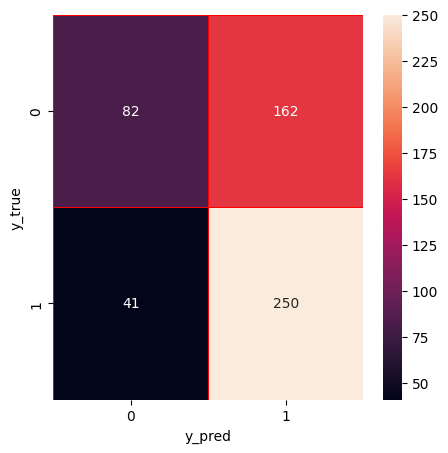

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0)  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly')

# Fit the SVM model to the training data
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_predict = svm_classifier.predict(X_test)

# Calculate accuracy
svm_score = accuracy_score(y_test, y_predict)
print('Accuracy of SVM: ', svm_score)

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict, average='weighted')
print('Precision of SVM: ', precision)
print('Recall of SVM: ', recall)
print('F1-score of SVM: ', fscore)
tw1a.append(svm_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)

# Generate a classification report
print(classification_report(y_test, y_predict))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


Accuracy of SVM:  0.6147465437788019
Precision of SVM:  0.6626630673210362
Recall of SVM:  0.6147465437788019
F1-score of SVM:  0.5934601623134274
              precision    recall  f1-score   support

           0       0.75      0.39      0.51       566
           1       0.56      0.86      0.68       519

    accuracy                           0.61      1085
   macro avg       0.66      0.62      0.60      1085
weighted avg       0.66      0.61      0.59      1085



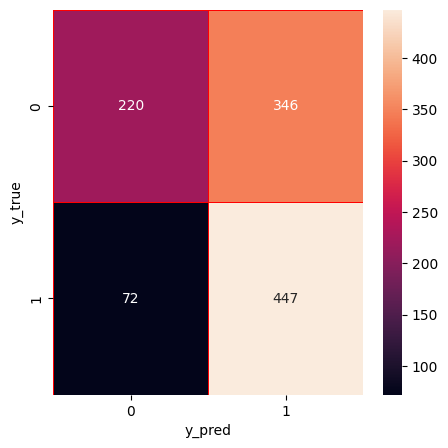

In [ ]:

# Predict the labels for the test data
y_predict = svm_classifier.predict(X_train)

# Calculate accuracy
svm_score = accuracy_score(y_train, y_predict)
print('Accuracy of SVM: ', svm_score)

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_predict, average='weighted')
print('Precision of SVM: ', precision)
print('Recall of SVM: ', recall)
print('F1-score of SVM: ', fscore)

ttw1a.append(svm_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)

# Generate a classification report
print(classification_report(y_train, y_predict))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_train, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()




In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define the objective function
def objective(params):
    params = {
        'C': params['C'],
        'kernel': params['kernel'],  # Specify kernel from hyperparameter search space
    }

    clf = SVC(**params)

    # Use cross-validation for better evaluation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')

    # Calculate the mean accuracy
    score = scores.mean()

    return {'loss': -score, 'status': STATUS_OK}

# Define the hyperparameter search space
space = {
    'C': hp.loguniform('C', -3, 3),  # Search in log scale for C (SVM regularization parameter)
    'kernel': hp.choice('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
    # You can add more hyperparameters here as needed
}

# Perform hyperparameter tuning
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

print("SVM: Hyperopt estimated optimum {}".format(best))


100%|██████████| 20/20 [00:07<00:00,  2.76trial/s, best loss: -0.695852534562212]
SVM: Hyperopt estimated optimum {'C': 11.64982828134434, 'kernel': 0}


Accuracy of SVM:  0.6747663551401869
Precision of SVM:  0.6735638268826291
Recall of SVM:  0.6747663551401869
F1-score of SVM:  0.6730122953922361
              precision    recall  f1-score   support

           0       0.66      0.60      0.63       244
           1       0.69      0.74      0.71       291

    accuracy                           0.67       535
   macro avg       0.67      0.67      0.67       535
weighted avg       0.67      0.67      0.67       535



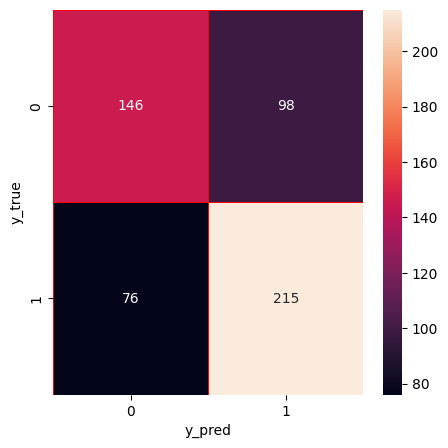

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', C= 19.900388328447658)  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly')

# Fit the SVM model to the training data
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_predict = svm_classifier.predict(X_test)

# Calculate accuracy
svm_score = accuracy_score(y_test, y_predict)
print('Accuracy of SVM: ', svm_score)

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict, average='weighted')
print('Precision of SVM: ', precision)
print('Recall of SVM: ', recall)
print('F1-score of SVM: ', fscore)
th1a.append(svm_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)

# Generate a classification report
print(classification_report(y_test, y_predict))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


Accuracy of SVM:  0.6847926267281106
Precision of SVM:  0.6896669352882727
Recall of SVM:  0.6847926267281106
F1-score of SVM:  0.6843613480707788
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       566
           1       0.65      0.74      0.69       519

    accuracy                           0.68      1085
   macro avg       0.69      0.69      0.68      1085
weighted avg       0.69      0.68      0.68      1085



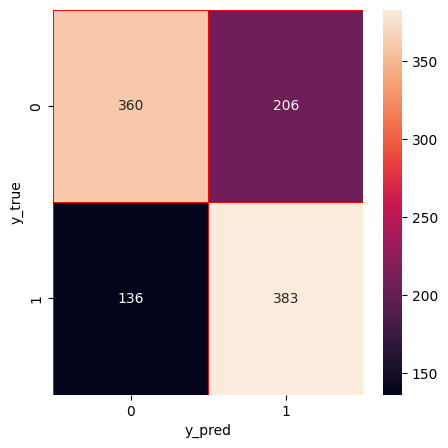

In [ ]:

# Predict the labels for the test data
y_predict = svm_classifier.predict(X_train)

# Calculate accuracy
svm_score = accuracy_score(y_train, y_predict)
print('Accuracy of SVM: ', svm_score)

# Calculate precision, recall, and F1-score
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_predict, average='weighted')
print('Precision of SVM: ', precision)
print('Recall of SVM: ', recall)
print('F1-score of SVM: ', fscore)

tth1a.append(svm_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)

# Generate a classification report
print(classification_report(y_train, y_predict))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_train, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()




Accuracy of XGBoost: 0.6280373831775701
Precision of XGBoost: 0.6306327053404875
Recall of XGBoost: 0.6280373831775701
F1-score of XGBoost: 0.6287022423191786
              precision    recall  f1-score   support

           0       0.59      0.63      0.61       244
           1       0.67      0.63      0.65       291

    accuracy                           0.63       535
   macro avg       0.63      0.63      0.63       535
weighted avg       0.63      0.63      0.63       535



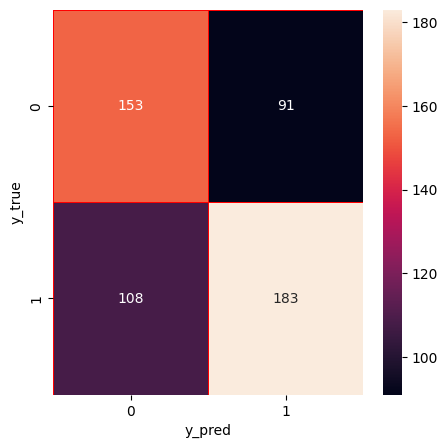

In [ ]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
tw1a.append(xg_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of XGBoost: 0.9410138248847926
Precision of XGBoost: 0.9413237206214625
Recall of XGBoost: 0.9410138248847926
F1-score of XGBoost: 0.9409631470578597
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       566
           1       0.95      0.92      0.94       519

    accuracy                           0.94      1085
   macro avg       0.94      0.94      0.94      1085
weighted avg       0.94      0.94      0.94      1085



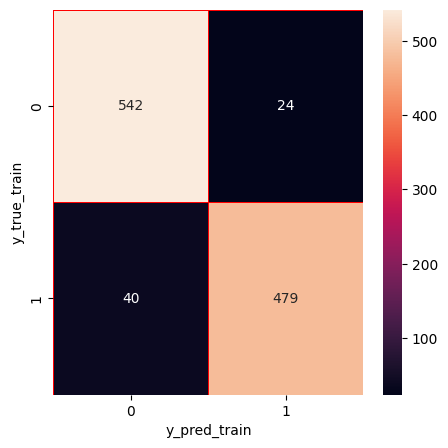

In [ ]:
xg_score=xg.score(X_train,y_train)
y_predict=xg.predict(X_train)
y_true=y_train
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
ttw1a.append(xg_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),

    }
    clf = xgb.XGBClassifier( **params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:35<00:00,  1.75s/trial, best loss: -0.6242990654205608]
XGBoost: Hyperopt estimated optimum {'learning_rate': -1.5548905598152798, 'max_depth': 21.0, 'n_estimators': 45.0}


Accuracy of XGBoost: 0.6037383177570094
Precision of XGBoost: 0.6073031308424276
Recall of XGBoost: 0.6037383177570094
F1-score of XGBoost: 0.6045014267389198
              precision    recall  f1-score   support

           0       0.56      0.61      0.58       244
           1       0.65      0.60      0.62       291

    accuracy                           0.60       535
   macro avg       0.60      0.60      0.60       535
weighted avg       0.61      0.60      0.60       535



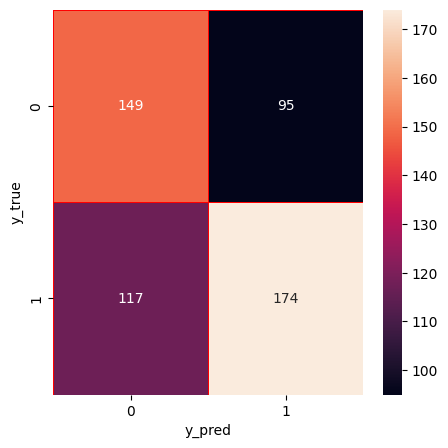

In [ ]:
xg = xgb.XGBClassifier(learning_rate= 0.9352296067937884, n_estimators = 20, max_depth = 94)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
th1a.append(xg_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of XGBoost: 0.9806451612903225
Precision of XGBoost: 0.9806552472916121
Recall of XGBoost: 0.9806451612903225
F1-score of XGBoost: 0.9806426898814343
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       566
           1       0.98      0.98      0.98       519

    accuracy                           0.98      1085
   macro avg       0.98      0.98      0.98      1085
weighted avg       0.98      0.98      0.98      1085



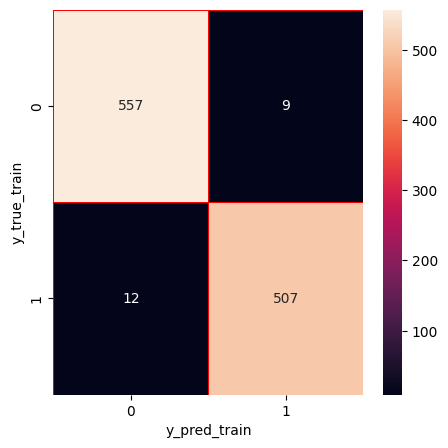

In [ ]:
xg_score=xg.score(X_train,y_train)
y_predict=xg.predict(X_train)
y_true=y_train
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tth1a.append(xg_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

Accuracy of RF: 0.6280373831775701
Precision of RF: 0.6345167885137172
Recall of RF: 0.6280373831775701
F1-score of RF: 0.6285834673252954
              precision    recall  f1-score   support

           0       0.58      0.66      0.62       244
           1       0.68      0.60      0.64       291

    accuracy                           0.63       535
   macro avg       0.63      0.63      0.63       535
weighted avg       0.63      0.63      0.63       535



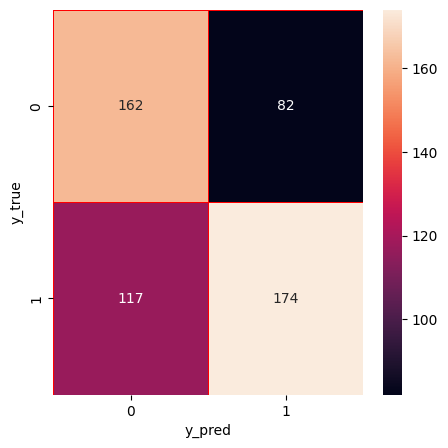

In [ ]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train)
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tw1a.append(rf_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of RF: 0.9806451612903225
Precision of RF: 0.9807639633693591
Recall of RF: 0.9806451612903225
F1-score of RF: 0.9806368528582448
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       566
           1       0.99      0.97      0.98       519

    accuracy                           0.98      1085
   macro avg       0.98      0.98      0.98      1085
weighted avg       0.98      0.98      0.98      1085



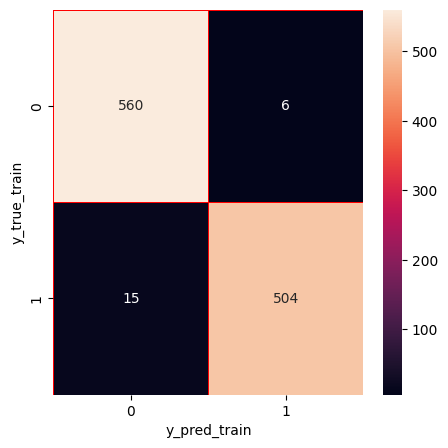

In [ ]:
rf_score=rf.score(X_train,y_train)
y_predict=rf.predict(X_train)
y_true=y_train
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
ttw1a.append(rf_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = RandomForestClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:16<00:00,  1.20trial/s, best loss: -0.6467289719626168]
Random Forest: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 6.0, 'max_features': 16.0, 'min_samples_leaf': 7.0, 'min_samples_split': 10.0, 'n_estimators': 111.0}


Accuracy of RF: 0.6411214953271028
Precision of RF: 0.645969142783086
Recall of RF: 0.6411214953271028
F1-score of RF: 0.6417893771327375
              precision    recall  f1-score   support

           0       0.60      0.66      0.63       244
           1       0.69      0.62      0.65       291

    accuracy                           0.64       535
   macro avg       0.64      0.64      0.64       535
weighted avg       0.65      0.64      0.64       535



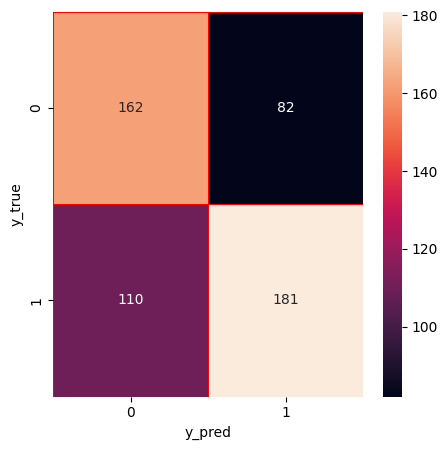

In [ ]:
rf_hpo = RandomForestClassifier(n_estimators = 25, min_samples_leaf = 10, max_depth = 24, min_samples_split = 6, max_features = 11, criterion = 'entropy')
rf_hpo.fit(X_train,y_train)
rf_score=rf_hpo.score(X_test,y_test)
y_predict=rf_hpo.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
th1a.append(rf_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of RF: 0.8460829493087557
Precision of RF: 0.8465140979692874
Recall of RF: 0.8460829493087557
F1-score of RF: 0.845846566203349
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       566
           1       0.86      0.82      0.84       519

    accuracy                           0.85      1085
   macro avg       0.85      0.84      0.85      1085
weighted avg       0.85      0.85      0.85      1085



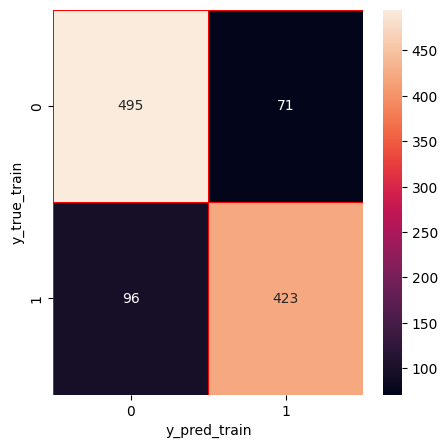

In [ ]:
rf_score=rf_hpo.score(X_train,y_train)
y_predict=rf_hpo.predict(X_train)
y_true=y_train
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tth1a.append(rf_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
rf_train=rf_hpo.predict(X_train)
rf_test=rf_hpo.predict(X_test)

Accuracy of DT: 0.5794392523364486
Precision of DT: 0.5817631499264981
Recall of DT: 0.5794392523364486
F1-score of DT: 0.5801470659797335
              precision    recall  f1-score   support

           0       0.54      0.57      0.55       244
           1       0.62      0.59      0.60       291

    accuracy                           0.58       535
   macro avg       0.58      0.58      0.58       535
weighted avg       0.58      0.58      0.58       535



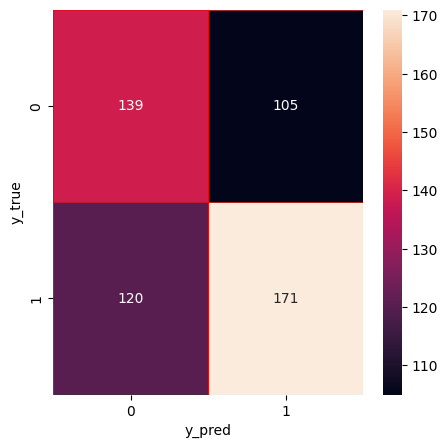

In [ ]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train)
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tw1a.append(dt_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of DT: 0.9806451612903225
Precision of DT: 0.9813375831180963
Recall of DT: 0.9806451612903225
F1-score of DT: 0.9806215908604173
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       566
           1       1.00      0.96      0.98       519

    accuracy                           0.98      1085
   macro avg       0.98      0.98      0.98      1085
weighted avg       0.98      0.98      0.98      1085



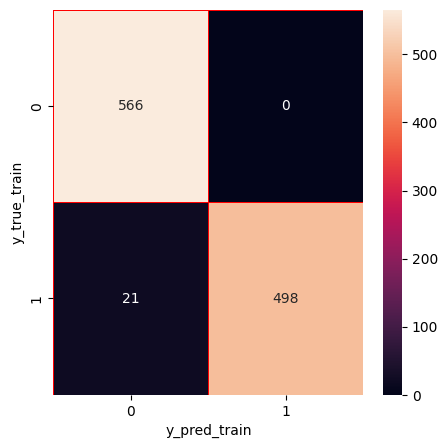

In [ ]:
dt_score=dt.score(X_train,y_train)
y_predict=dt.predict(X_train)
y_true=y_train
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
ttw1a.append(dt_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = DecisionTreeClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)
print("Decision tree: Hyperopt estimated optimum {}".format(best))

100%|██████████| 50/50 [00:01<00:00, 40.27trial/s, best loss: -0.6280373831775701]
Decision tree: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 5.0, 'max_features': 6.0, 'min_samples_leaf': 2.0, 'min_samples_split': 10.0}


Accuracy of DT: 0.6205607476635514
Precision of DT: 0.6314129573895138
Recall of DT: 0.6205607476635514
F1-score of DT: 0.6202902963238778
              precision    recall  f1-score   support

           0       0.57      0.69      0.62       244
           1       0.68      0.56      0.62       291

    accuracy                           0.62       535
   macro avg       0.63      0.63      0.62       535
weighted avg       0.63      0.62      0.62       535



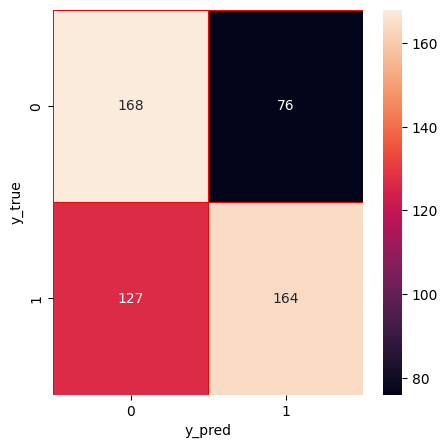

In [ ]:
dt_hpo = DecisionTreeClassifier(min_samples_leaf = 2, max_depth = 7, min_samples_split = 10, max_features = 5, criterion = 'entropy')
dt_hpo.fit(X_train,y_train)
dt_score=dt_hpo.score(X_test,y_test)
y_predict=dt_hpo.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
th1a.append(dt_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of DT: 0.7502304147465437
Precision of DT: 0.753629267850998
Recall of DT: 0.7502304147465437
F1-score of DT: 0.7482642174730507
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       566
           1       0.78      0.67      0.72       519

    accuracy                           0.75      1085
   macro avg       0.75      0.75      0.75      1085
weighted avg       0.75      0.75      0.75      1085



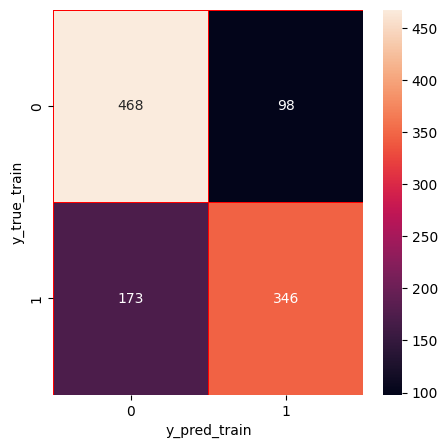

In [ ]:
dt_score=dt_hpo.score(X_train,y_train)
y_predict=dt_hpo.predict(X_train)
y_true=y_train
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tth1a.append(dt_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
dt_train=dt_hpo.predict(X_train)
dt_test=dt_hpo.predict(X_test)

Accuracy of ET: 0.611214953271028
Precision of ET: 0.6160099248114015
Recall of ET: 0.611214953271028
F1-score of ET: 0.611938491893799
              precision    recall  f1-score   support

           0       0.57      0.63      0.60       244
           1       0.66      0.59      0.62       291

    accuracy                           0.61       535
   macro avg       0.61      0.61      0.61       535
weighted avg       0.62      0.61      0.61       535



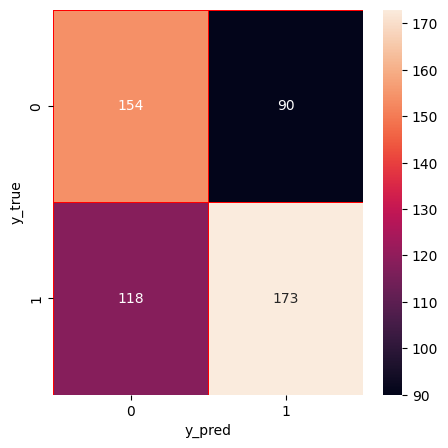

In [ ]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train)
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
tw1a.append(et_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of ET: 0.9806451612903225
Precision of ET: 0.9813375831180963
Recall of ET: 0.9806451612903225
F1-score of ET: 0.9806215908604173
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       566
           1       1.00      0.96      0.98       519

    accuracy                           0.98      1085
   macro avg       0.98      0.98      0.98      1085
weighted avg       0.98      0.98      0.98      1085



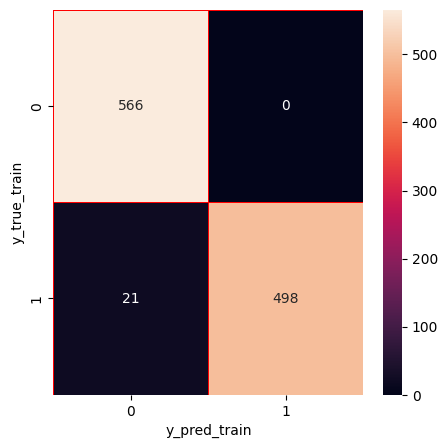

In [ ]:
et_score=et.score(X_train,y_train)
y_predict=et.predict(X_train)
y_true=y_train
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
ttw1a.append(et_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = ExtraTreesClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:04<00:00,  4.31trial/s, best loss: -0.6504672897196262]
Random Forest: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 16.0, 'max_features': 12.0, 'min_samples_leaf': 8.0, 'min_samples_split': 3.0, 'n_estimators': 17.0}


Accuracy of ET: 0.6392523364485981
Precision of ET: 0.6425987969983737
Recall of ET: 0.6392523364485981
F1-score of ET: 0.639942124275903
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       244
           1       0.68      0.63      0.66       291

    accuracy                           0.64       535
   macro avg       0.64      0.64      0.64       535
weighted avg       0.64      0.64      0.64       535



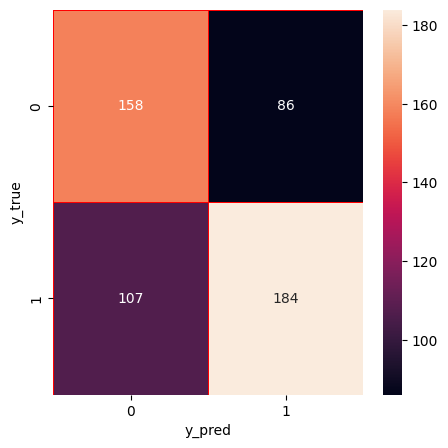

In [ ]:
et_hpo = ExtraTreesClassifier(n_estimators = 12, min_samples_leaf = 9, max_depth = 6, min_samples_split = 8, max_features = 14, criterion = 'gini')
et_hpo.fit(X_train,y_train)
et_score=et_hpo.score(X_test,y_test)
y_predict=et_hpo.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
th1a.append(et_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of ET: 0.7327188940092166
Precision of ET: 0.733262899897811
Recall of ET: 0.7327188940092166
F1-score of ET: 0.732831599514589
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       566
           1       0.71      0.74      0.72       519

    accuracy                           0.73      1085
   macro avg       0.73      0.73      0.73      1085
weighted avg       0.73      0.73      0.73      1085



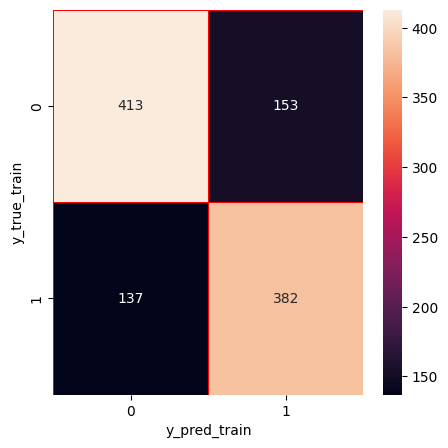

In [ ]:
et_score=et_hpo.score(X_train,y_train)
y_predict=et_hpo.predict(X_train)
y_true=y_train
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
tth1a.append(et_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
et_train=et_hpo.predict(X_train)
et_test=et_hpo.predict(X_test)

[LightGBM] [Info] Number of positive: 519, number of negative: 566
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25499
[LightGBM] [Info] Number of data points in the train set: 1085, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.478341 -> initscore=-0.086690
[LightGBM] [Info] Start training from score -0.086690
Accuracy of LightGBM: 0.6205607476635514
Precision of LightGBM: 0.6251543263096182
Recall of LightGBM: 0.6205607476635514
F1-score of LightGBM: 0.6212776100662862
              precision    recall  f1-score   support

           0       0.58      0.64      0.61       244
           1       0.67      0.60      0.63       291

    accuracy                           0.62       535
   macro avg       0.62      0.62      0.62       535
weighted avg       0.63      0.62      0.62       535



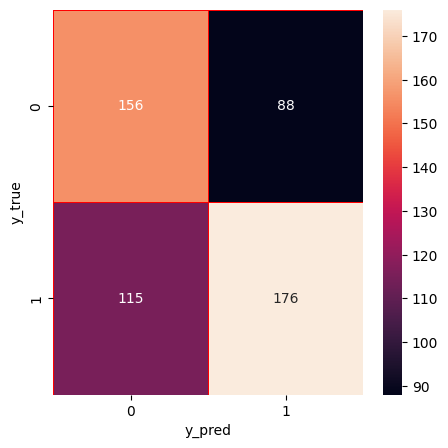

In [ ]:
lgbm = lgb.LGBMClassifier(random_state=0)
lgbm.fit(X_train, y_train)
lgbm_score = lgbm.score(X_test, y_test)
y_predict = lgbm.predict(X_test)
y_true = y_test
print('Accuracy of LightGBM: ' + str(lgbm_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LightGBM: ' + str(precision))
print('Recall of LightGBM: ' + str(recall))
print('F1-score of LightGBM: ' + str(fscore))
print(classification_report(y_true, y_predict))
tw1a.append(lgbm_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of LightGBM: 0.9806451612903225
Precision of LightGBM: 0.9806783542533265
Recall of LightGBM: 0.9806451612903225
F1-score of LightGBM: 0.9806408767708764
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       566
           1       0.98      0.97      0.98       519

    accuracy                           0.98      1085
   macro avg       0.98      0.98      0.98      1085
weighted avg       0.98      0.98      0.98      1085



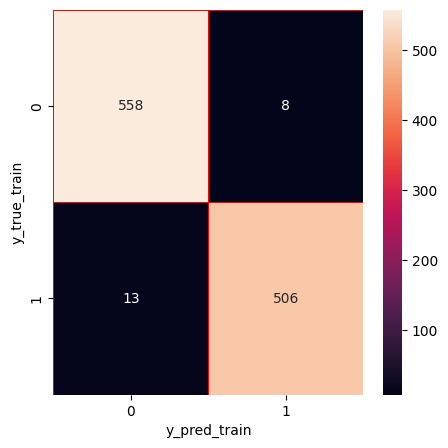

In [ ]:
lgbm_score = lgbm.score(X_train, y_train)
y_predict = lgbm.predict(X_train)
y_true = y_train
print('Accuracy of LightGBM: ' + str(lgbm_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LightGBM: ' + str(precision))
print('Recall of LightGBM: ' + str(recall))
print('F1-score of LightGBM: ' + str(fscore))
print(classification_report(y_true, y_predict))
ttw1a.append(lgbm_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'num_leaves': int(params['num_leaves']),
        'min_child_samples': int(params['min_child_samples']),
        'learning_rate': params['learning_rate'],
        'subsample': params['subsample'],
        'colsample_bytree': params['colsample_bytree']
    }
    clf = lgb.LGBMClassifier(**params, random_state=0)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)
    return {'loss':-score, 'status': STATUS_OK }
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 1),
    'max_depth': hp.quniform('max_depth', 5, 30, 1),
    'num_leaves': hp.quniform('num_leaves', 20, 100, 1),
    'min_child_samples': hp.quniform('min_child_samples', 5, 50, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0)
}
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

print("LightGBM: Hyperopt estimated optimum {}".format(best))

[LightGBM] [Info] Number of positive: 519, number of negative: 566
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002660 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25499
[LightGBM] [Info] Number of data points in the train set: 1085, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.478341 -> initscore=-0.086690
[LightGBM] [Info] Start training from score -0.086690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Info] Number of positive: 519, number of negative: 566
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25499
[LightGBM] [Info] Number of data points in the train set: 1085, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.478341 -> initscore=-0.086690
[LightGBM] [Info] Start training from score -0.086690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

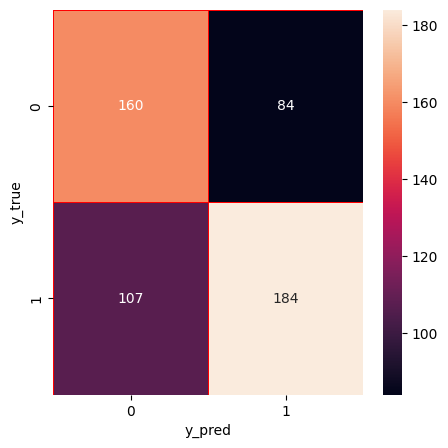

In [ ]:
best_params = {
    'n_estimators': 200,
    'max_depth': 17,
    'num_leaves': 26,
    'min_child_samples': 44,
    'learning_rate': 0.02909788620173054,
    'subsample': 0.6488465322418104,
    'colsample_bytree': 0.5651051627645269
}
lgbm_hpo = lgb.LGBMClassifier(**best_params, random_state=0)
lgbm_hpo.fit(X_train, y_train)
lgbm_score = lgbm_hpo.score(X_test, y_test)
y_predict = lgbm_hpo.predict(X_test)
y_true = y_test
print('Accuracy of LightGBM (Hyperopt): ' + str(lgbm_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LightGBM (Hyperopt): ' + str(precision))
print('Recall of LightGBM (Hyperopt): ' + str(recall))
print('F1-score of LightGBM (Hyperopt): ' + str(fscore))
th1a.append(lgbm_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of LightGBM (Hyperopt): 0.9419354838709677
Precision of LightGBM (Hyperopt): 0.9420156752743173
Recall of LightGBM (Hyperopt): 0.9419354838709677
F1-score of LightGBM (Hyperopt): 0.9419105585747346
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       566
           1       0.95      0.93      0.94       519

    accuracy                           0.94      1085
   macro avg       0.94      0.94      0.94      1085
weighted avg       0.94      0.94      0.94      1085



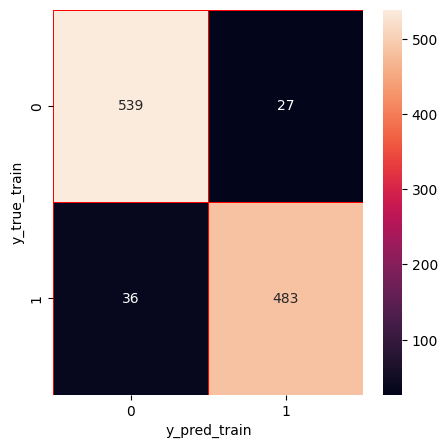

In [ ]:
lgbm_score = lgbm_hpo.score(X_train, y_train)
y_predict = lgbm_hpo.predict(X_train)
y_true = y_train
print('Accuracy of LightGBM (Hyperopt): ' + str(lgbm_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LightGBM (Hyperopt): ' + str(precision))
print('Recall of LightGBM (Hyperopt): ' + str(recall))
print('F1-score of LightGBM (Hyperopt): ' + str(fscore))
print(classification_report(y_true, y_predict))
tth1a.append(lgbm_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
lgbm_train=lgbm_hpo.predict(X_train)
lgbm_test=lgbm_hpo.predict(X_test)

Accuracy of AdaBoost: 0.6411214953271028
Precision of AdaBoost: 0.6442681113302212
Recall of AdaBoost: 0.6411214953271028
F1-score of AdaBoost: 0.6418002943033525
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       244
           1       0.68      0.64      0.66       291

    accuracy                           0.64       535
   macro avg       0.64      0.64      0.64       535
weighted avg       0.64      0.64      0.64       535



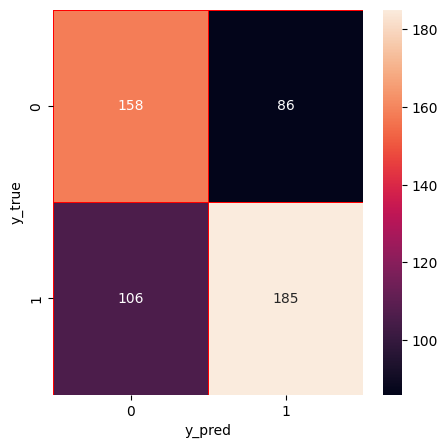

In [ ]:
adaboost = AdaBoostClassifier(random_state=0)
adaboost.fit(X_train, y_train)
adaboost_score = adaboost.score(X_test, y_test)
y_predict = adaboost.predict(X_test)
y_true = y_test
print('Accuracy of AdaBoost: ' + str(adaboost_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of AdaBoost: ' + str(precision))
print('Recall of AdaBoost: ' + str(recall))
print('F1-score of AdaBoost: ' + str(fscore))
tw1a.append(adaboost_score)
tw1p.append(precision)
tw1r.append(recall)
tw1f.append(fscore)
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of AdaBoost: 0.783410138248848
Precision of AdaBoost: 0.7833477713173083
Recall of AdaBoost: 0.783410138248848
F1-score of AdaBoost: 0.7832661909980941
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       566
           1       0.78      0.76      0.77       519

    accuracy                           0.78      1085
   macro avg       0.78      0.78      0.78      1085
weighted avg       0.78      0.78      0.78      1085



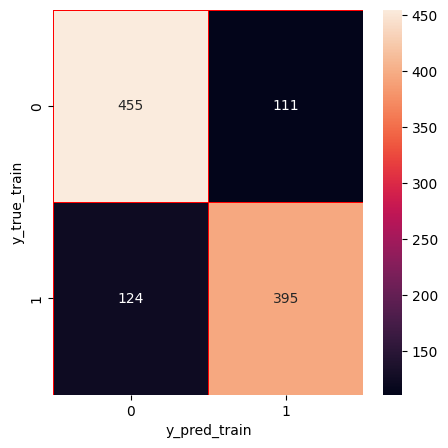

In [ ]:
adaboost_score = adaboost.score(X_train, y_train)
y_predict = adaboost.predict(X_train)
y_true = y_train
print('Accuracy of AdaBoost: ' + str(adaboost_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of AdaBoost: ' + str(precision))
print('Recall of AdaBoost: ' + str(recall))
print('F1-score of AdaBoost: ' + str(fscore))
ttw1a.append(adaboost_score)
ttw1p.append(precision)
ttw1r.append(recall)
ttw1f.append(fscore)
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'learning_rate': params['learning_rate'],
    }
    clf = AdaBoostClassifier(**params, random_state=0)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)
    return {'loss': -score, 'status': STATUS_OK}
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
}
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)
print("AdaBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [01:27<00:00,  4.36s/trial, best loss: -0.6616822429906543]
AdaBoost: Hyperopt estimated optimum {'learning_rate': 0.01774118114348084, 'n_estimators': 264.0}


Accuracy of AdaBoost (Hyperopt): 0.6654205607476635
Precision of AdaBoost (Hyperopt): 0.6660306739014091
Recall of AdaBoost (Hyperopt): 0.6654205607476635
F1-score of AdaBoost (Hyperopt): 0.665667560098165
              precision    recall  f1-score   support

           0       0.63      0.64      0.64       244
           1       0.70      0.68      0.69       291

    accuracy                           0.67       535
   macro avg       0.66      0.66      0.66       535
weighted avg       0.67      0.67      0.67       535



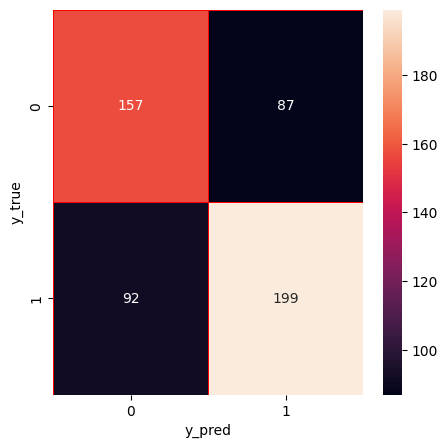

In [ ]:
best_params = {
    'n_estimators': 219,
    'learning_rate': 0.009312865849402404,
}
adaboost_hpo = AdaBoostClassifier(**best_params, random_state=0)
adaboost_hpo.fit(X_train, y_train)
adaboost_score = adaboost_hpo.score(X_test, y_test)
y_predict = adaboost_hpo.predict(X_test)
y_true = y_test
print('Accuracy of AdaBoost (Hyperopt): ' + str(adaboost_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of AdaBoost (Hyperopt): ' + str(precision))
print('Recall of AdaBoost (Hyperopt): ' + str(recall))
print('F1-score of AdaBoost (Hyperopt): ' + str(fscore))
print(classification_report(y_true, y_predict))
th1a.append(adaboost_score)
th1p.append(precision)
th1r.append(recall)
th1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy of AdaBoost (Hyperopt): 0.7050691244239631
Precision of AdaBoost (Hyperopt): 0.7049026697630063
Recall of AdaBoost (Hyperopt): 0.7050691244239631
F1-score of AdaBoost (Hyperopt): 0.7049259267784591
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       566
           1       0.70      0.68      0.69       519

    accuracy                           0.71      1085
   macro avg       0.70      0.70      0.70      1085
weighted avg       0.70      0.71      0.70      1085



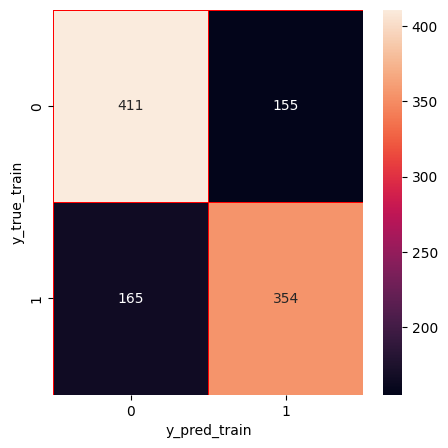

In [ ]:
adaboost_score = adaboost_hpo.score(X_train, y_train)
y_predict = adaboost_hpo.predict(X_train)
y_true = y_train
print('Accuracy of AdaBoost (Hyperopt): ' + str(adaboost_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of AdaBoost (Hyperopt): ' + str(precision))
print('Recall of AdaBoost (Hyperopt): ' + str(recall))
print('F1-score of AdaBoost (Hyperopt): ' + str(fscore))
print(classification_report(y_true, y_predict))
tth1a.append(adaboost_score)
tth1p.append(precision)
tth1r.append(recall)
tth1f.append(fscore)
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_true_train")
plt.show()

In [ ]:
ttw = [ttw1a,ttw1p,ttw1r,ttw1f]
tw = [tw1a,tw1p,tw1r,tw1f]
tth = [tth1a,tth1p,tth1r,tth1f]
th = [th1a,th1p,th1r,th1f]
ttw = pd.DataFrame(ttw).transpose()
ttw.columns = ["Accuracy","Precision","Recall","F1Score"]
ttw.index = ["svm","xgb","rf","dt","et","lgbm","adaboost"]
tw = pd.DataFrame(tw).transpose()
tw.columns = ["Accuracy","Precision","Recall","F1Score"]
tw.index = ["svm","xgb","rf","dt","et","lgbm","adaboost"]
tth = pd.DataFrame(tth).transpose()
tth.columns = ["Accuracy","Precision","Recall","F1Score"]
tth.index = ["svm","xgb","rf","dt","et","lgbm","adaboost"]
th = pd.DataFrame(th).transpose()
th.columns = ["Accuracy","Precision","Recall","F1Score"]
th.index = ["svm","xgb","rf","dt","et","lgbm","adaboost"]

In [ ]:
df = pd.concat([ttw,tw,tth,th],axis=1)

In [ ]:
df

,Accuracy,Precision,Recall,F1Score,Accuracy,Precision,Recall,F1Score,Accuracy,Precision,Recall,F1Score,Accuracy,Precision,Recall,F1Score
svm,0.614747,0.662663,0.614747,0.593460,0.620561,0.634102,0.620561,0.590665,0.684793,0.689667,0.684793,0.684361,0.674766,0.673564,0.674766,0.673012
xgb,0.941014,0.941324,0.941014,0.940963,0.628037,0.630633,0.628037,0.628702,0.980645,0.980655,0.980645,0.980643,0.603738,0.607303,0.603738,0.604501
rf,0.980645,0.980764,0.980645,0.980637,0.628037,0.634517,0.628037,0.628583,0.846083,0.846514,0.846083,0.845847,0.641121,0.645969,0.641121,0.641789
dt,0.980645,0.981338,0.980645,0.980622,0.579439,0.581763,0.579439,0.580147,0.750230,0.753629,0.750230,0.748264,0.620561,0.631413,0.620561,0.620290
et,0.980645,0.981338,0.980645,0.980622,0.611215,0.616010,0.611215,0.611938,0.732719,0.733263,0.732719,0.732832,0.639252,0.642599,0.639252,0.639942
lgbm,0.980645,0.980678,0.980645,0.980641,0.620561,0.625154,0.620561,0.621278,0.941935,0.942016,0.941935,0.941911,0.642991,0.646744,0.642991,0.643681
adaboost,0.783410,0.783348,0.783410,0.783266,0.641121,0.644268,0.641121,0.641800,0.705069,0.704903,0.705069,0.704926,0.665421,0.666031,0.665421,0.665668


In [ ]:
df.to_excel("output.xlsx")